The cool lab 5 😎

In [330]:
#load in the dataset
import pandas as pd
import numpy as np
df = pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [331]:
#the goal here is the simple binary classification, is it going to rain or not tomorrow?
#lets see how many rows there are
categorical_cols = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', "RainToday"]
df.groupby(['RainTomorrow']).count()
#looks like we have about 110316 for no rain and 31877 for rain. This is great! I do not think we need to fold with this much per class

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
RainTomorrow,,,,,,,,,,,,,,,,,,,,,
No,110316,110316,109854,110049,109586,63491,57556,103453,103488,102224,...,109076,107670,99405,99448,67914,64811,109710,108332,109586,110316
Yes,31877,31877,31702,31822,31201,17859,16821,29410,29435,29956,...,31343,30913,28774,28764,20622,20288,31579,31135,31201,31877


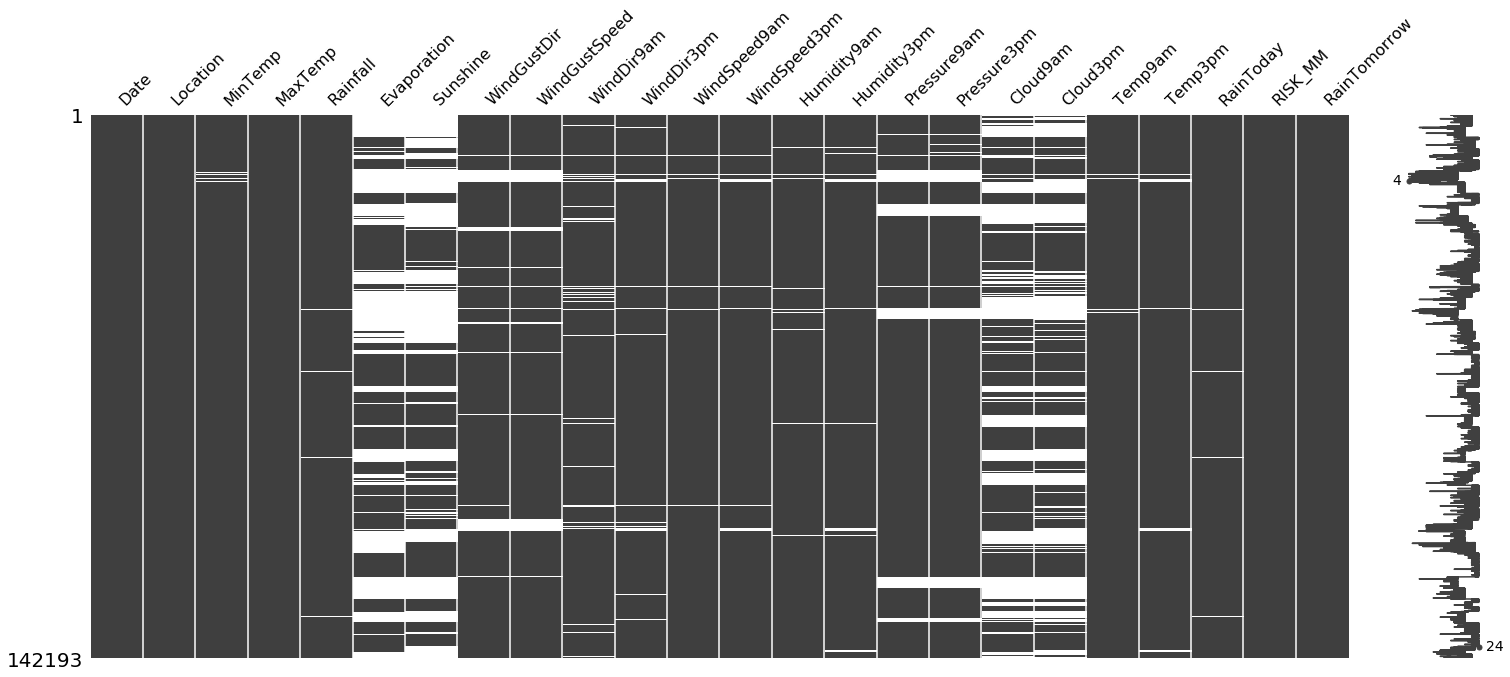

In [332]:
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

import missingno as mn

mn.matrix(df)

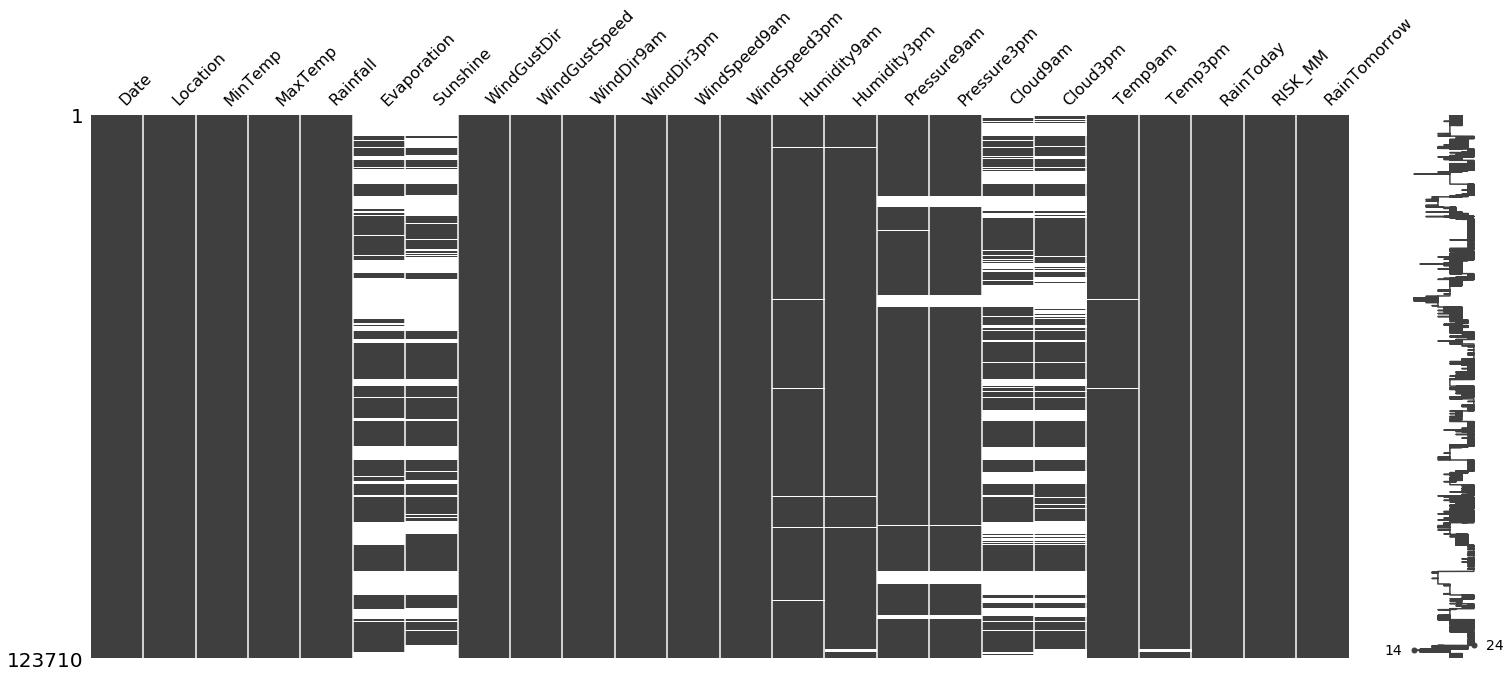

In [333]:
#NOOO We have to make sure we have no NaNs. This is gonna be a pain in the ass
#this many imputations is gonna need a whole package to make this easy for me
#df = df.drop(columns=['Date'])
from fancyimpute import KNN   #message me if you have trouble installing this. 

#WE NEED TO REMOVE ALL ROWS MISSING ANY CATEGORICAL DATA bc its dumb to impute
df= df.dropna(subset=categorical_cols)
mn.matrix(df)

oooo. this is wacky looking. this link is an interesting read on what to do with the 4 variables that have a ton of null values    https://towardsdatascience.com/handling-missing-values-in-machine-learning-part-1-dda69d4f88ca   
for now... well just ignore it :(


In [334]:
#lets split into train and test, were gonna do a standard 80/20 split for now
#first lets grab y as the 
di = {"No": 0, "Yes": 1}
df = df.replace({"RainTomorrow": di})
y = df['RainTomorrow']
df.drop(columns=['RainTomorrow'])

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,0.0
142189,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,0.0
142190,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,0.0
142191,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,0.0


In [335]:
y

0         0
1         0
2         0
3         0
4         0
         ..
142188    0
142189    0
142190    0
142191    0
142192    0
Name: RainTomorrow, Length: 123710, dtype: int64

In [336]:
#one hot encode here
df_copy = df
for col in categorical_cols:
    one_hot = pd.get_dummies(df[col],prefix=col, drop_first=True)
    df = df.join(one_hot)
df = df.drop(columns=categorical_cols)
df.head()

,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,...,1,0,0,0,0,0,0,0,0,0


In [337]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_numeric = df.select_dtypes(include=[np.float, np.int])
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(df_numeric.values)  
IterativeImputer(add_indicator=False, estimator=None,
                 imputation_order='ascending', initial_strategy='mean',
                 max_iter=10, max_value=None, min_value=None,
                 missing_values=np.nan, n_nearest_features=None,
                 random_state=0, sample_posterior=False, tol=.001,
                 verbose=0)
df_nums = ((imp.transform(df_numeric.values)))


//anaconda3/lib/python3.7/site-packages/sklearn/impute/_iterative.py:603: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


In [338]:
counter = 0
print(df.shape)
for col in df_numeric:
    df[col] = df_nums[:,counter]
    counter +=1
df

(123710, 111)


,Date,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,...,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes
0,2008-12-01,13.4,22.9,0.6,6.334952,7.038910,44.0,20.0,24.0,71.0,...,0,0,0,0,0,0,0,1,0,0
1,2008-12-02,7.4,25.1,0.0,6.192396,10.914368,44.0,4.0,22.0,44.0,...,0,0,0,0,0,0,0,0,1,0
2,2008-12-03,12.9,25.7,0.0,8.628473,11.683565,46.0,19.0,26.0,38.0,...,0,0,0,0,0,0,0,0,1,0
3,2008-12-04,9.2,28.0,0.0,6.879155,11.224579,24.0,11.0,9.0,45.0,...,0,0,0,0,0,0,0,0,0,0
4,2008-12-05,17.5,32.3,1.0,7.385664,5.913099,41.0,7.0,20.0,82.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,2017-06-20,3.5,21.8,0.0,4.867399,9.726333,31.0,15.0,13.0,59.0,...,0,0,0,0,0,0,0,0,0,0
142189,2017-06-21,2.8,23.4,0.0,5.352749,10.312107,31.0,13.0,11.0,51.0,...,0,0,0,0,0,0,0,0,0,0
142190,2017-06-22,3.6,25.3,0.0,5.434457,10.877257,22.0,13.0,9.0,56.0,...,0,0,0,0,0,0,0,0,0,0
142191,2017-06-23,5.4,26.9,0.0,6.248845,10.492719,37.0,9.0,9.0,53.0,...,0,0,0,0,0,0,0,1,0,0


In [344]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = .80)
encoded_test, encoded_train, encoded_y_test, encoded_y_train = train_test_split(df_copy, y, test_size = .80)
print(encoded_y_train, encoded_train)

131365    1
93049     0
18994     1
124754    0
22541     1
         ..
5077      0
113496    0
111701    0
115226    1
119407    0
Name: RainTomorrow, Length: 98968, dtype: int64               Date       Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
131365  2013-04-13     Launceston      7.7     18.8       4.2          NaN   
93049   2015-04-05     Townsville     24.6     33.0       0.0          7.0   
18994   2012-10-09      NorahHead     13.4     18.7       0.0          NaN   
124754  2011-09-11        Walpole      7.9     22.3       0.0          NaN   
22541   2014-07-07  NorfolkIsland     17.3     19.2       0.0          3.8   
...            ...            ...      ...      ...       ...          ...   
5077    2015-01-22  BadgerysCreek     18.7     31.3       1.2          NaN   
113496  2013-12-30     PearceRAAF     15.8     35.5       0.0          NaN   
111701  2016-11-01    Witchcliffe      5.8     19.5       0.4          NaN   
115226  2010-06-13   PerthAirport      6

In [345]:
from keras.layers import Dense, Activation, Input
from keras.layers import Embedding, Flatten, Concatenate
from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
#standard wide and deep with no cross columns

from sklearn.preprocessing import OneHotEncoder
from keras.layers import concatenate
# now let's encode the integer outputs as one hot encoded labels
ohe = OneHotEncoder()
numeric_cols = ["MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", 
                "WindSpeed3pm", "Humidity3pm", "Pressure9am", "Humidity9am", "Pressure3pm", 
               "Cloud9am", "Temp9am", "Cloud3pm", "Temp3pm", "RISK_MM"]

feature_columns = categorical_cols+numeric_cols
# we should not be standard scaling our categorical features. This is wrong

In [346]:
#TODO: we need to decide on our columns we think have relation? I dont even want to think about that right now tbh
#probably use f1 score because we want to get a good true positive vs negative rate for a binary classification.

### This is the standard wide/deep network that I made 
X_train_num =  encoded_train[numeric_cols].values
X_test_num = encoded_test[numeric_cols].values
dfs = []
dfs_test = []

# we need to create separate sequential models for each embedding
embed_branches = []
X_ints_train = [] # keep track of inputs for each branch
X_ints_test = []# keep track of inputs for each branch
all_inputs = [] # this is what we will give to keras.Model inputs
all_branch_outputs = [] 


encoders = dict() 
for col in categorical_cols:
    encoders[col] = LabelEncoder() # save the encoder
    print(encoded_train[col].values)
    encoded_train[col+'_int'] = encoders[col].fit_transform(encoded_train[col])
    encoded_test[col+'_int'] = encoders[col].transform(encoded_test[col])
    print(encoded_train[col+"_int"])
    
    # encode as ints for the embedding
    X_ints_train.append( encoded_train[col + "_int" ].values ) # this df_train is a vector of the integers we are one hot encoding
    X_ints_test.append( encoded_test[col + "_int"].values )
    # get the number of categories
    N = max(X_ints_train[-1]+1) # same as the max(df_train[col]) grab the last column, whats the max value +1. this value tells us how many categories there are for that variable
    
    # create embedding branch from the number of categories
    inputs = Input(shape=(1,),dtype='int32', name=col)
    all_inputs.append( inputs ) # keep track of created inputs
    x = Embedding(input_dim=N, 
                  output_dim=int(np.sqrt(N)), 
                  input_length=1, name=col+'_embed')(inputs)
    x = Flatten()(x)
    all_branch_outputs.append(x)
all_inputs.append(Input(shape=(X_train_num.shape[1],),sparse=False, name='numeric'))
x = Dense(units=20, activation='relu',name='numeric_1')(all_inputs[-1])
all_branch_outputs.append( Dense(units=10,activation='relu', name='numeric_2')(x) )

# merge the branches together
final_branch = concatenate(all_branch_outputs, name='concat_1')
final_branch = Dense(units=1,activation='sigmoid', name='combined')(final_branch)

model = Model(inputs=all_inputs, outputs=final_branch)
    

['Launceston' 'Townsville' 'NorahHead' ... 'Witchcliffe' 'PerthAirport'
 'Perth']
131365    16
93049     37
18994     24
124754    41
22541     25
          ..
5077       3
113496    27
111701    44
115226    30
119407    29
Name: Location_int, Length: 98968, dtype: int64
['NNW' 'NNW' 'SSE' ... 'SSE' 'NNE' 'NE']
131365     6
93049      6
18994     10
124754     6
22541      1
          ..
5077       0
113496    12
111701    10
115226     5
119407     4
Name: WindGustDir_int, Length: 98968, dtype: int64
['NNW' 'W' 'SSE' ... 'ESE' 'NE' 'E']
131365     6
93049     13
18994     10
124754     3
22541      4
          ..
5077       5
113496     2
111701     2
115226     4
119407     0
Name: WindDir9am_int, Length: 98968, dtype: int64
['NNW' 'N' 'SSE' ... 'SSE' 'N' 'NE']


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


131365     6
93049      3
18994     10
124754     8
22541      1
          ..
5077       1
113496    15
111701    10
115226     3
119407     4
Name: WindDir3pm_int, Length: 98968, dtype: int64
['Yes' 'No' 'No' ... 'No' 'No' 'No']
131365    1
93049     0
18994     0
124754    0
22541     0
         ..
5077      1
113496    0
111701    0
115226    0
119407    0
Name: RainToday_int, Length: 98968, dtype: int64


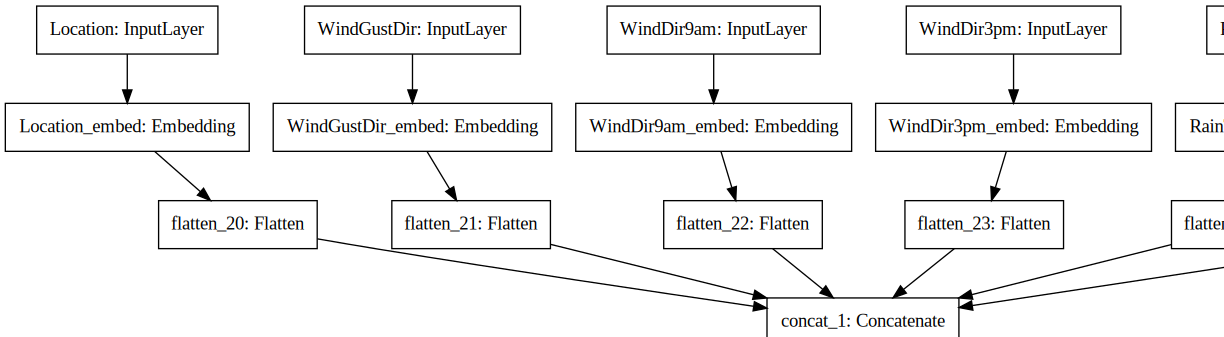

In [326]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

# you will need to install pydot properly on your machine to get this running
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [ ]:
%%time

model.compile(optimizer='sgd',
              loss='mean_squared_error',
              metrics=['accuracy'])

model.fit(X_ints_train + [X_train_num], # create a list of inputs for embeddings
        encoded_y_train, epochs=10, batch_size=32, verbose=1)

# yhat = model.predict([X_test_ohe,
#                       X_test_num]) # each branch has an input

# yhat = np.round(yhat)
# print(mt.confusion_matrix(y_test,yhat),mt.accuracy_score(y_test,yhat))

//anaconda3/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/10
98968/98968 [==============================] - 14s 140us/step - loss: nan - accuracy: 1.0104e-05
Epoch 2/10
98968/98968 [==============================] - 13s 128us/step - loss: nan - accuracy: 0.0000e+00
Epoch 3/10
98968/98968 [==============================] - 9s 93us/step - loss: nan - accuracy: 0.0000e+00
Epoch 4/10
98968/98968 [==============================] - 9s 94us/step - loss: nan - accuracy: 0.0000e+00
Epoch 5/10
65440/98968 [==================>...........] - ETA: 3s - loss: nan - accuracy: 0.0000e+00

85496      No
79202      No
29464      No
27454      No
15681      No
         ... 
44918      No
64326     Yes
13158      No
123479    Yes
12299     Yes
Name: RainTomorrow, Length: 28438, dtype: object